# The Sparks Foundation: Task 1- Prediction using Supervised Machine Learning ( Beginner)





### Name:Gagan Sharma

### GRIPFEBRUARY2023


### Problem statement: Prediction using supervised machine learning. Predict the percentage of an student based on the no of study hours. what will be the predicted score of a student studies for 9.25 hrs/day?

###  ->Import all the required library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import r2_score

###  ->Read data set and find basic details

In [ ]:
try:
    df = pd.read_csv('students.csv')
    print('Data read done successfully...')
except (FileNotFoundError, IOError):
    print("Wrong file or file path")

In [3]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.shape

(25, 2)

#### Here dataset having two column and 25 rows

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### In this dataset two type of data available hours attribute contain float type of data and scores attribute contain int type of data

In [7]:
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [8]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

### ->Descriptive Analysis

In [9]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### ->Data Exploration

In [10]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

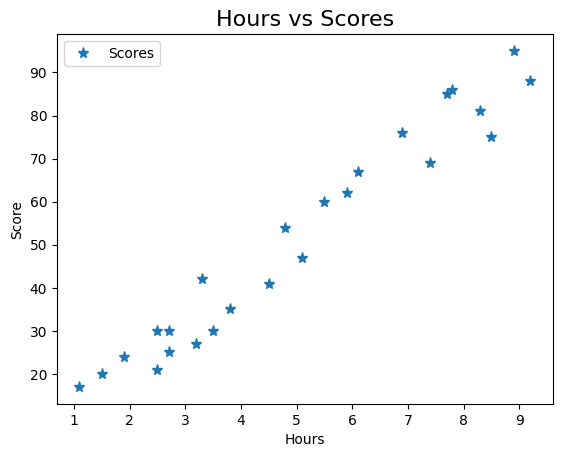

In [11]:
df.plot(x='Hours', y='Scores', style='*',markersize=8)  
plt.title('Hours vs Scores', fontsize=16)  
plt.xlabel('Hours')  
plt.ylabel('Score')  
plt.show()

#### The above graph show that their is a positive linear relation between hours and the scores

### -> Traning and Testing

### Linear Regression Model

In [12]:
# split data depandent and indepandent
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

In [13]:
# slice data in 80 % for training of model 20 % for testing of model using Scikit-learn librarie
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [14]:
# train model using Scikit-learn linear model
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [17]:
reg = LinearRegression()
reg.fit(X_train,y_train)

print("Training completly done")

Training completly done


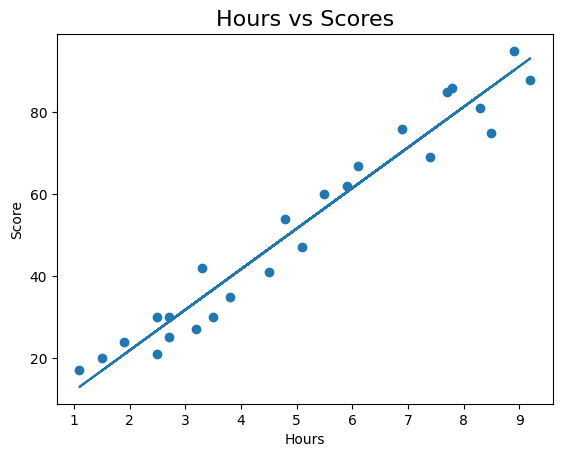

In [17]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.title('Hours vs Scores', fontsize=16)  
plt.xlabel('Hours')  
plt.ylabel('Score') 
plt.show()

In [18]:
# trained algorithm  to make predictions
print(X_test) 
print("\n")
y_pred = regressor.predict(X_test) 
print(y_pred)


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [19]:
# Useing pandas librarie to create data frame of Comparing Actual vs Predicted
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
data 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
# prediction score
hours = [9.25]
prediction = regressor.predict([hours])
print(f"Predicted score is = {prediction[0]}")

In [21]:
r2_score=r2_score(y_test,y_pred)
r2_score

0.9454906892105355

In [22]:
# performance of algorithm using mean Absolute Error
from sklearn import metrics  
print( f"Mean Absolute Error : {metrics.mean_absolute_error(y_test, y_pred)}") 

Mean Absolute Error : 4.183859899002975


### Hence, the predicted score if a student studies for 9.25 hr/day is 92.21

In [ ]:
## end